# Integration

## 3.1 Integrals

## 3.2 Review of elementary integrals

## 3.3 Overview of integration methods in python

## 3.4 Integration by parts

### 3.1: An example of integration by parts

In [3]:
from sympy import symbols, integrate, cos, sin, exp
x = symbols('x')
n = symbols('n', positive=True)

print('The indefinite cosine integral = ', integrate(x*cos(n*x),x))
print('The indefinite sine integral = ', integrate(x*sin(n*x),x))

The indefinite cosine integral =  x*sin(n*x)/n + cos(n*x)/n**2
The indefinite sine integral =  -x*cos(n*x)/n + sin(n*x)/n**2


In [4]:
print('The indefinite integral 1 = ', integrate(x**3*sin(x),x))
print('The indefinite integral 2 = ', integrate(x**2*exp(x),x))

The indefinite integral 1 =  -x**3*cos(x) + 3*x**2*sin(x) + 6*x*cos(x) - 6*sin(x)
The indefinite integral 2 =  (x**2 - 2*x + 2)*exp(x)


## 3.5 Parametric integration for definite integrals

### Example 3.2: An example of the parametric integration method

In [6]:
from sympy import symbols, integrate, exp, oo
x, t = symbols('x ,t', real=True, positive=True)

int1 = integrate(x*exp(-x*t), (x, 0, oo))
int2 = integrate(x**2*exp(-x*t), (x, 0, oo))

print(int1)
print(int2)

t**(-2)
2/t**3


In [9]:
n = symbols('n', positive=True, real=True)
int3 = integrate(x**(2*n)*exp(-x**2*t), (x, 0, oo))
print(int3)

t**(1/2 - n)*gamma(n + 1/2)/(2*t)


## 3.6 Integrating analytical functions in python

### Example 3.3: Integration of Newton's law

In [10]:
from sympy import symbols, integrate
t, F0, m = symbols('t, F0, m', real=True)

int1 = integrate(F0/m*(1/(t**2+1)), t)
print(int1)

F0*atan(t)/m


### Example 3.4: Expectation value of the position in Qunatim Mechanics

In [12]:
import sympy as sym
# symbolic integration with sympy.integrate
from scipy import integrate
x = sym.symbols('x')
int0 = sym.integrate(x**3, (x, 0, 1)) + sym.integrate(x*((2-x)**2), (x,1,2))
print(int0)

2/3


In [13]:
f = lambda x: x**3
int1 = integrate.quad(f, 0, 1)
print(int1)

g = lambda x: x*((2-x)**2)
int2 = integrate.quad(g, 1, 2)
print(int2)

print(int1[0] + int2[0])

(0.25, 2.7755575615628914e-15)
(0.41666666666666674, 4.625929269271486e-15)
0.6666666666666667


### Example 3.5: Center of mass of a rod

In [15]:
import sympy as sym
from scipy import integrate
x, L = sym.symbols('x, L')

int1 = integrate.quad(lambda x: 2*x**2, 0, 1)  # 1st integral numerically
int2 = integrate.quad(lambda x: 2*x, 0, 1)  # second integral
print(int1[0]/int2[0])

0.6666666666666667


In [17]:
symb = sym.integrate(2*x**2, (x, 0, L))/sym.integrate(2*x, (x,0,L))
print(symb)

2*L/3


## 3.7 Fourier series

### Example 3.6: Evaluaton of Fourier coefficients for a periodic function

In [18]:
from sympy import symbols, integrate, sin, cos, pi
x = symbols('x')
n = symbols('n', integer=True, positive=True)
print("Fourier coefficients an= ", integrate(x*cos(n*x), (x, -pi, pi))/pi)
print("Fourier coefficients bn= ", integrate(x*sin(n*x), (x, -pi, pi))/pi)

Fourier coefficients an=  0
Fourier coefficients bn=  -2*(-1)**n/n


## 3.8 Improper integrals and integrals of special functions

### Example 3.7: Using the error function in Quantum Mechanics

In [19]:
from sympy import symbols, integrate, exp, oo, solve, sqrt
x, m, omega, hbar, A = symbols('x, m, omega, hbar, A', positive=True)

lhs = integrate((A*exp(-m*omega/(2*hbar)*x**2))**2, (x,-oo,oo))
print(lhs)

sqrt(pi)*A**2*sqrt(hbar)/(sqrt(m)*sqrt(omega))


In [20]:
A1 = solve(lhs-1,A)
print(A1)

[m**(1/4)*omega**(1/4)/(pi**(1/4)*hbar**(1/4))]


In [21]:
expectx = integrate(x*(A1[0]*exp(-m*omega/(2*hbar)*x**2))**2,\
(x,-oo,oo))
print(expectx)

0


findfont: Font family ['cmsy10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmr10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmtt10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmmi10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmb10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmss10'] not found. Falling back to DejaVu Sans.
findfont: Font family ['cmex10'] not found. Falling back to DejaVu Sans.


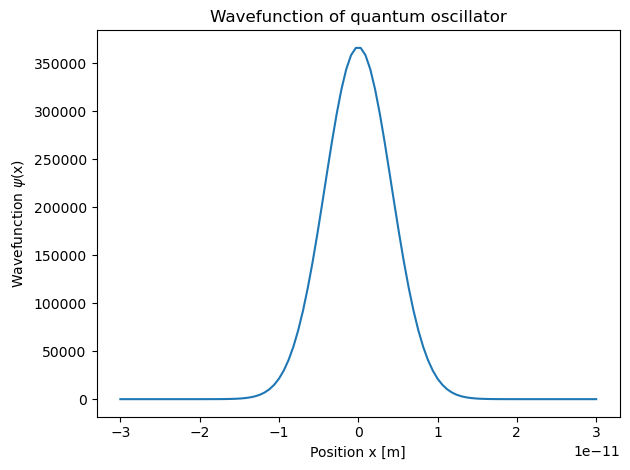

In [23]:
import numpy as np
import matplotlib.pyplot as plt

m =1.163e-26#effectivevibrationalmassofnitrogenmoleculeinkg
omega =5.16e14#molecularvibrationfrequencyins**-1
hbar =1.0545e-34#hbarinJ.s

# Normalization constant A
A = m**(1/4)*omega**(1/4)/(np.pi**(1/4)*hbar**(1/4))

f = lambda x: A*np.exp(-m*omega/(2*hbar)*x**2)
x1 = np.linspace(-.3e-10, .3e-10,100)

plt.plot(x1, f(x1))
plt.title("Wavefunction of quantum oscillator")
plt.xlabel("Position x [m]")
plt.ylabel("Wavefunction $\psi$(x)")
plt.tight_layout()
plt.show()

### Example 3.8: The Hermite polynomials

In [24]:
from scipy import special, integrate
import matplotlib.pyplot as plt
import numpy as np

p4 = special.hermite(4)  # Hermite polynomial n=4
p3 = special.hermite(3)  # Hermite polynomial n=3

# define integrand function
f = lambda x: special.eval_hermite(3,x)*special.eval_hermite(4,x)*\
np.exp(-x**2)

print("The integral = ", integrate.quad(f, -np.inf, np.inf))

The integral =  (0.0, 0.0)


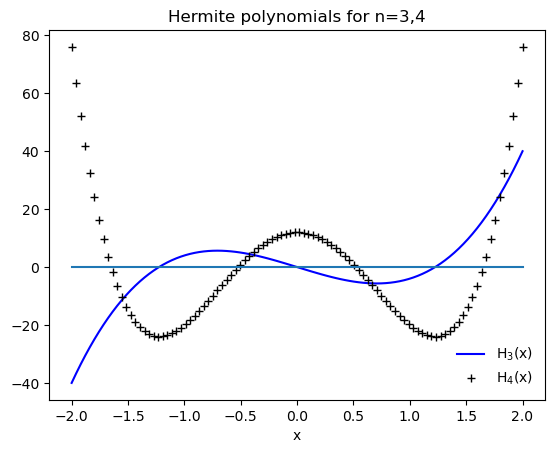

In [25]:
x1 = np.linspace(-2, 2, 100)
plt.title("Hermite polynomials for n=3,4")
plt.plot(x1, p3(x1), "b-", label="H$_3$(x)")
plt.plot(x1, p4(x1), "k+", label="H$_4$(x)")
plt.xlabel('x')
plt.plot(x1, [0]*len(x1))
leg = plt.legend()
leg.get_frame().set_linewidth(0.0)
plt.show()

### Example 3.9: The Maxwell-Boltzmann distribution

In [27]:
from sympy import symbols, sqrt, pi, exp, integrate, oo, simplify
import matplotlib.pyplot as plt
import numpy as np

v, m, k, T = symbols('v, m, k, T', positive=True)

f1 = sqrt(2/pi*((m/(k*T))**3))*v**3*exp(-m*v**2/(2*k*T))
int1 = integrate(f1, (v, 0, oo))
print(simplify(int1))

2*sqrt(2)*sqrt(T)*sqrt(k)/(sqrt(pi)*sqrt(m))


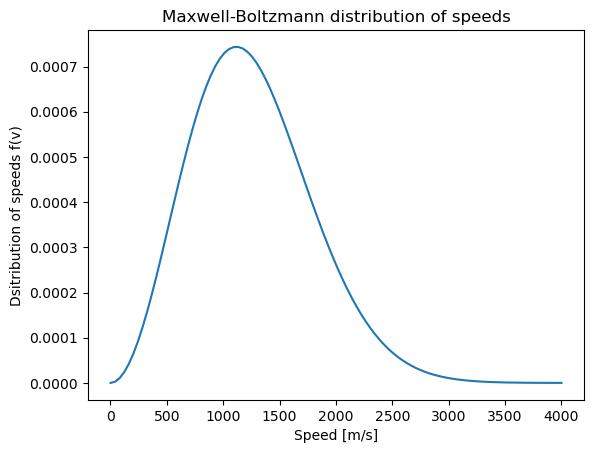

In [29]:
# Plot MB distribution of speeds for nitrogen
m =6.6464731e-27#atomicmassnitrogeninkg
T =300 # roomtemepratureinK
k =1.380649e-23#BoltzmannconstantinJ/K

v1 = np.linspace(1, 4000, 100)
a = np.sqrt(2/np.pi*((m/(k*T))**3))
b = m/(2*k*T)

f = lambda v: a*v**2*np.exp(-b*v**2)

plt.plot(v1, f(v1))
plt.title('Maxwell-Boltzmann distribution of speeds')
plt.xlabel('Speed [m/s]')
plt.ylabel('Dsitribution of speeds f(v)')
plt.show()

## 3.9 Integrating fucntions defined by numpy arrays

### Example 3.10: Error function: applying the trapezoidal rule

In [32]:
from scipy import integrate
import numpy as np

f = lambda x: np.exp(-x**2/2)
print("integrate with quad: ", integrate.quad(f, 0, 1)[0], '\n')
x1 = np.linspace(0, 1, 10)

print("integrate with trapz() and N=10: ", np.trapz(f(x1),x1))

x1 = np.linspace(0, 1, 100)
print("integrate with trapz() and N=100: ", np.trapz(f(x1),x1))

integrate with quad:  0.855624391892149 

integrate with trapz() and N=10:  0.855000132137889
integrate with trapz() and N=100:  0.8556192348272017


### 3.9.1 Simpson's rule

### Example 3.11: Error function: applying Simpson's rule

In [34]:
from scipy import integrate
import matplotlib.pyplot as plt
import numpy as np

f = lambda x: np.exp(-x**2/2)

print("integragte with quad: ", integrate.quad(f, -1, 1)[0], '\n')
x1 = np.linspace(-1, 1, 10)
print(integrate.simpson(f(x1), x1))
x1 = np.linspace(-1, 1, 100)
print(integrate.simpson(f(x1), x1))

integragte with quad:  1.7112487837842973 

1.711422150923532
1.7112487946132824
